In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import matplotlib.ticker as mtick

In [33]:
from google.colab import files
uploaded = files.upload()

Saving inflacion_2007_2025_diciembre.csv to inflacion_2007_2025_diciembre (1).csv


In [34]:


df = pd.read_csv("inflacion_2007_2025_diciembre.csv", sep=";")


In [35]:
df.columns

Index(['Fecha', 'Valor'], dtype='object')

In [36]:
df

,Fecha,Valor
0,31/1/2007,"1,1"
1,28/2/2007,"0,3"
2,31/3/2007,"0,8"
3,30/4/2007,"0,7"
4,31/5/2007,"0,4"
...,...,...
223,31/8/2025,"1,9"
224,30/9/2025,"2,1"
225,31/10/2025,"2,3"
226,30/11/2025,"2,5"


¿Qué niveles de inflación se registraron anualmente entre 2007 y 2024?



In [37]:
#elimnino la columna (Unnamed: 0)
#df = df.drop(columns='Unnamed: 0')

In [38]:
#cambio el formato de la fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

In [39]:
#cambio el nombre de la columna
df.rename(columns={'Valor' : 'Inflacion mensual'}, inplace=True)

In [40]:
#cambio  Inflacion mensual a float, primero reemplasa las comas por punto y luego paso a float
df['Inflacion mensual'] = df['Inflacion mensual'].astype(str).str.replace(',','.').astype(float)

In [41]:
# creo columna año
df['Año'] = df['Fecha'].dt.year

In [42]:
#creo la columna factor mensual
df['factor mensual'] = 1 + (df['Inflacion mensual'] / 100)

In [43]:
#saco el producto
factor_anual_compuesto = df.groupby('Año')['factor mensual'].prod()

In [44]:
# Inflación anual en porcentaje
inflacion_anual = ( factor_anual_compuesto - 1) * 100

In [45]:

inflacion_anual = inflacion_anual.reset_index()
#renombre la columna
inflacion_anual.columns = ['Año', 'Inflacion anual (%)']

In [46]:
inflacion_anual

,Año,Inflacion anual (%)
0,2007,8.404147
1,2008,7.118946
2,2009,7.333069
3,2010,10.469534
4,2011,9.163396
5,2012,10.580430
6,2013,10.687526
7,2014,23.697588
8,2015,18.463079
9,2016,33.075635


In [47]:
#filtro el año de 2007 a 2025
inflacion_anual_07_25 = inflacion_anual[(inflacion_anual['Año']>= 2007) & (inflacion_anual['Año'] <= 2025)]

In [48]:
año=inflacion_anual_07_25['Año']
inf=inflacion_anual_07_25['Inflacion anual (%)'].round(2)

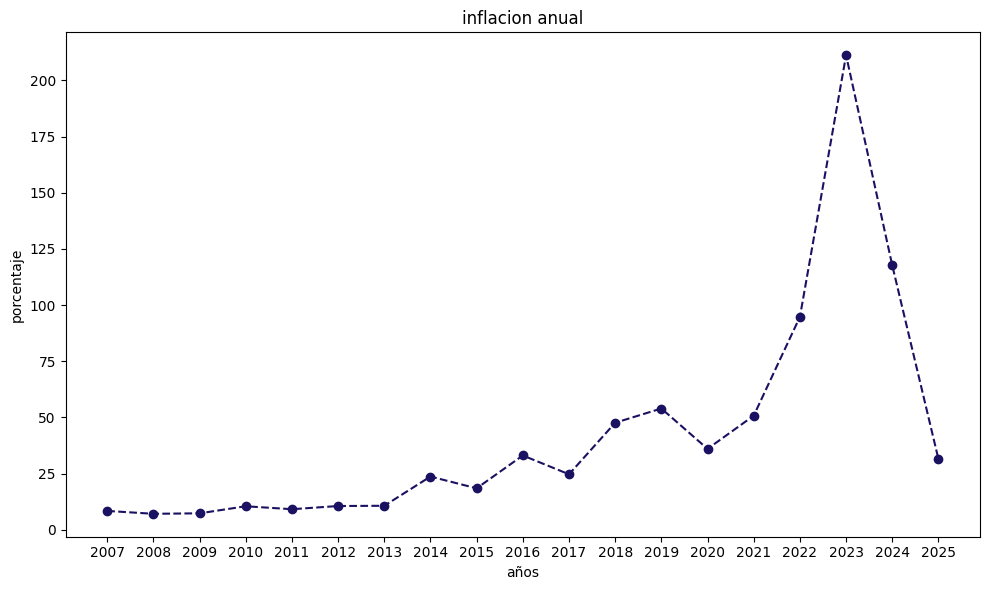

In [49]:
fig, ax= plt.subplots(figsize=(10, 6))

ax.plot(año, inf , linestyle='dashed',  marker='o', color='#1B1162')

ax.set_title('inflacion anual')
ax.set_xlabel('años')
ax.set_ylabel('porcentaje')

ax.set_xticks(año)

plt.tight_layout()
plt.show()



In [50]:
df

,Fecha,Inflacion mensual,Año,factor mensual
0,2007-01-31,1.1,2007,1.011
1,2007-02-28,0.3,2007,1.003
2,2007-03-31,0.8,2007,1.008
3,2007-04-30,0.7,2007,1.007
4,2007-05-31,0.4,2007,1.004
...,...,...,...,...
223,2025-08-31,1.9,2025,1.019
224,2025-09-30,2.1,2025,1.021
225,2025-10-31,2.3,2025,1.023
226,2025-11-30,2.5,2025,1.025


¿Cómo varió el promedio de inflación mensual entre 2020 y 2024?



In [51]:
#creo una nueva columna (mes)
df['Mes'] = df['Fecha'].dt.month
#creo una nueva columna (mes nombres)
df['Mes nombre'] = df['Fecha'].dt.month_name()

In [52]:
#filtro del año 2020 a 2024
filtro_años = df[(df['Año'] >=2020 ) & (df['Año'] <=2024 )][['Año','Mes','Mes nombre','Inflacion mensual']]


In [53]:
#agrupo la inflacion por años
promedio = filtro_años.groupby(['Mes','Mes nombre'])['Inflacion mensual'].mean().reset_index()
promedio

,Mes,Mes nombre,Inflacion mensual
0,1,January,7.36
1,2,February,6.02
2,3,March,6.70
3,4,April,5.76
4,5,May,4.38
5,6,June,4.26
6,7,July,4.52
7,8,August,5.76
8,9,September,5.74
9,10,October,4.92


In [54]:
#elimino la columna mes numero 1,2,3,4
promedio = promedio.drop(columns='Mes')
promedio

,Mes nombre,Inflacion mensual
0,January,7.36
1,February,6.02
2,March,6.70
3,April,5.76
4,May,4.38
5,June,4.26
6,July,4.52
7,August,5.76
8,September,5.74
9,October,4.92


In [55]:
m = promedio['Mes nombre']
im = promedio['Inflacion mensual']

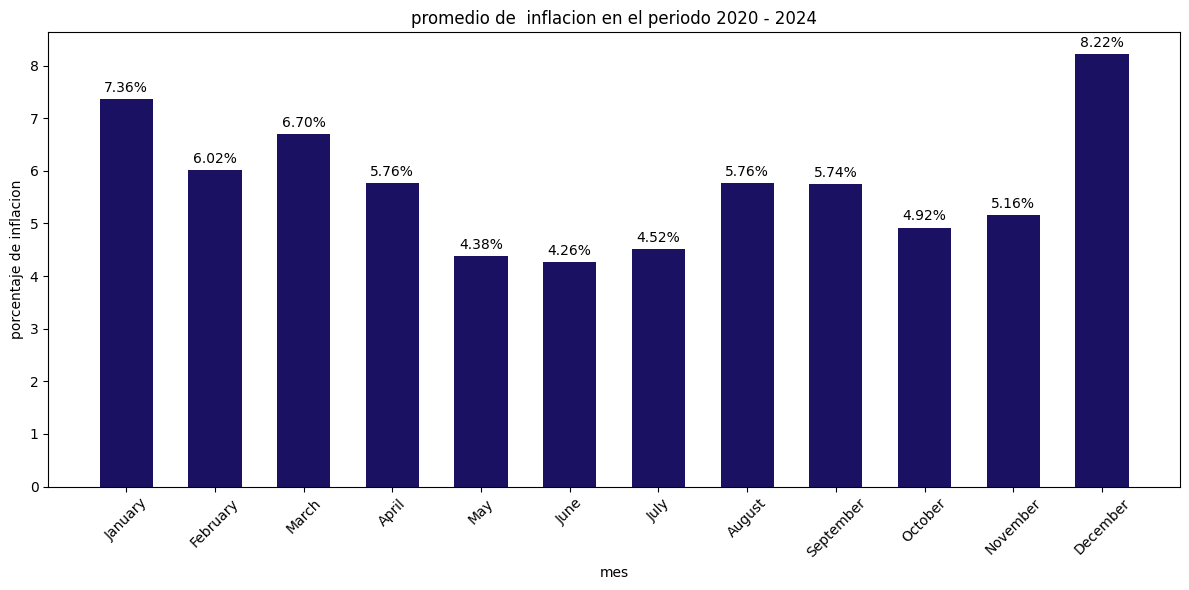

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))

bar = ax.bar(m, im,  width=0.6,  color='#1B1162')
ax.set_title('promedio de  inflacion en el periodo 2020 - 2024')
ax.set_xlabel('mes')
ax.set_ylabel('porcentaje de inflacion')
ax.bar_label(bar, labels=[f"{v:.2f}%" for v in im], padding=3)

ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()



cual fue la inflacion mensual   del periodo 2022-2025  

In [57]:
#creo la columna mes año
df['Mes-Año'] = df['Fecha'].dt.strftime('%b-%Y')

In [58]:
df

,Fecha,Inflacion mensual,Año,factor mensual,Mes,Mes nombre,Mes-Año
0,2007-01-31,1.1,2007,1.011,1,January,Jan-2007
1,2007-02-28,0.3,2007,1.003,2,February,Feb-2007
2,2007-03-31,0.8,2007,1.008,3,March,Mar-2007
3,2007-04-30,0.7,2007,1.007,4,April,Apr-2007
4,2007-05-31,0.4,2007,1.004,5,May,May-2007
...,...,...,...,...,...,...,...
223,2025-08-31,1.9,2025,1.019,8,August,Aug-2025
224,2025-09-30,2.1,2025,1.021,9,September,Sep-2025
225,2025-10-31,2.3,2025,1.023,10,October,Oct-2025
226,2025-11-30,2.5,2025,1.025,11,November,Nov-2025


In [59]:
#filtro  mes_año y inflacion mensual desde el año 2022 al 2025
infla_mes_a_mes = df[(df['Año']>=2022)&(df['Año']<=2025)][['Mes-Año','Inflacion mensual']]


In [60]:
mes_año=infla_mes_a_mes['Mes-Año']
inf_mensual=infla_mes_a_mes['Inflacion mensual']

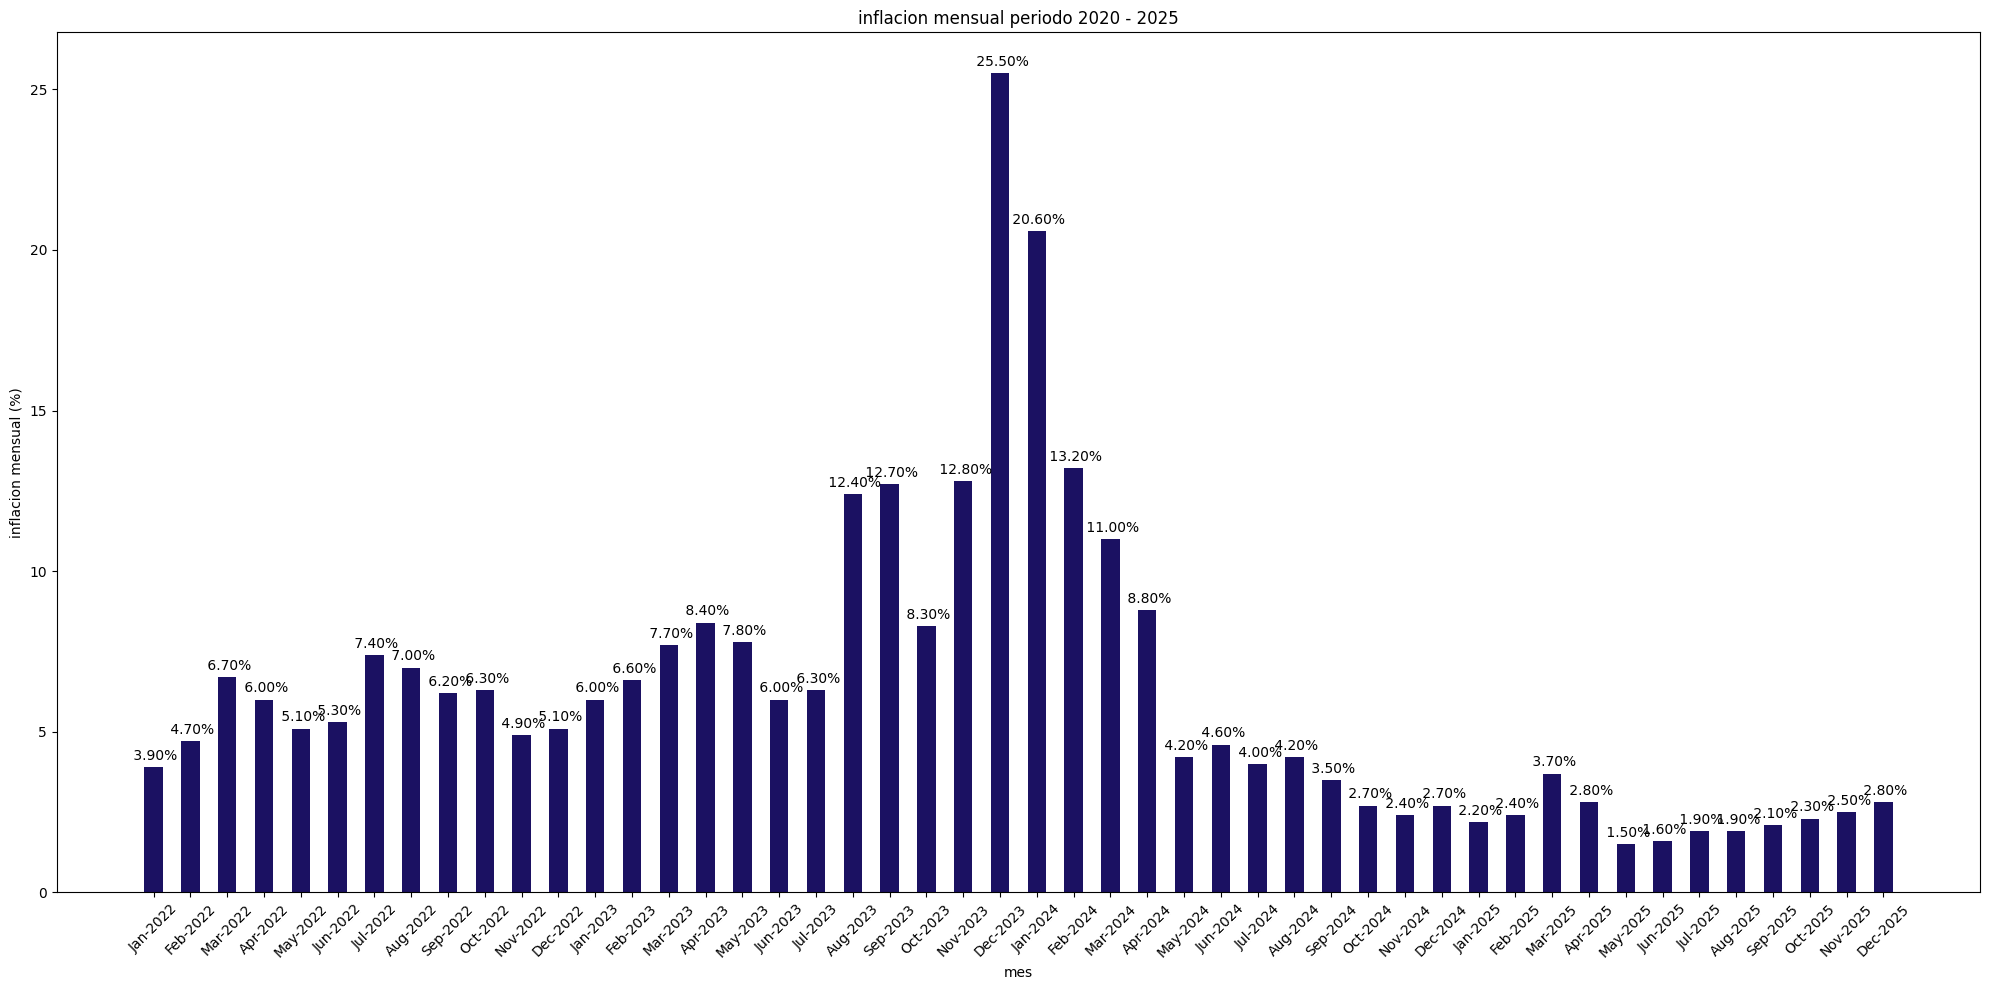

In [61]:
fig, ax= plt.subplots(figsize=(20, 10))

bar = ax.bar(mes_año, inf_mensual,  width=0.5,  color='#1B1162' )
ax.set_title('inflacion mensual periodo 2020 - 2025')
ax.set_xlabel('mes')
ax.set_ylabel('inflacion mensual (%)')
ax.bar_label(bar, labels= [f"{v: .2f}%" for v in inf_mensual], padding= 3)
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()